In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# graphviz 실행파일 설치 : https://graphviz.org/download/
# graphviz python library 설치
# !pip install graphviz

In [3]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X = breast_cancer['data']
y = breast_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [4]:
# DecisionTreeClassifier 모델 훈련
from sklearn.tree import DecisionTreeClassifier

scores = []
for d in [3, 4, 5, 6, 7, 8, 9, 10]:
    dtc = DecisionTreeClassifier(max_depth=d, random_state=42)

    dtc.fit(X_train, y_train)

    scores.append((d, dtc.score(X_train, y_train), dtc.score(X_test, y_test)))

In [5]:
scores

[(3, 0.9765258215962441, 0.9440559440559441),
 (4, 0.9882629107981221, 0.9440559440559441),
 (5, 0.9953051643192489, 0.9370629370629371),
 (6, 0.9976525821596244, 0.9370629370629371),
 (7, 1.0, 0.9230769230769231),
 (8, 1.0, 0.9230769230769231),
 (9, 1.0, 0.9230769230769231),
 (10, 1.0, 0.9230769230769231)]

In [6]:
# DecisionTreeClassifier 모델 훈련
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(dtc, out_file="data-files/breast-cancer-dtc.dot",
                class_names=breast_cancer['target_names'],
                feature_names=breast_cancer['feature_names'],
                filled=True)

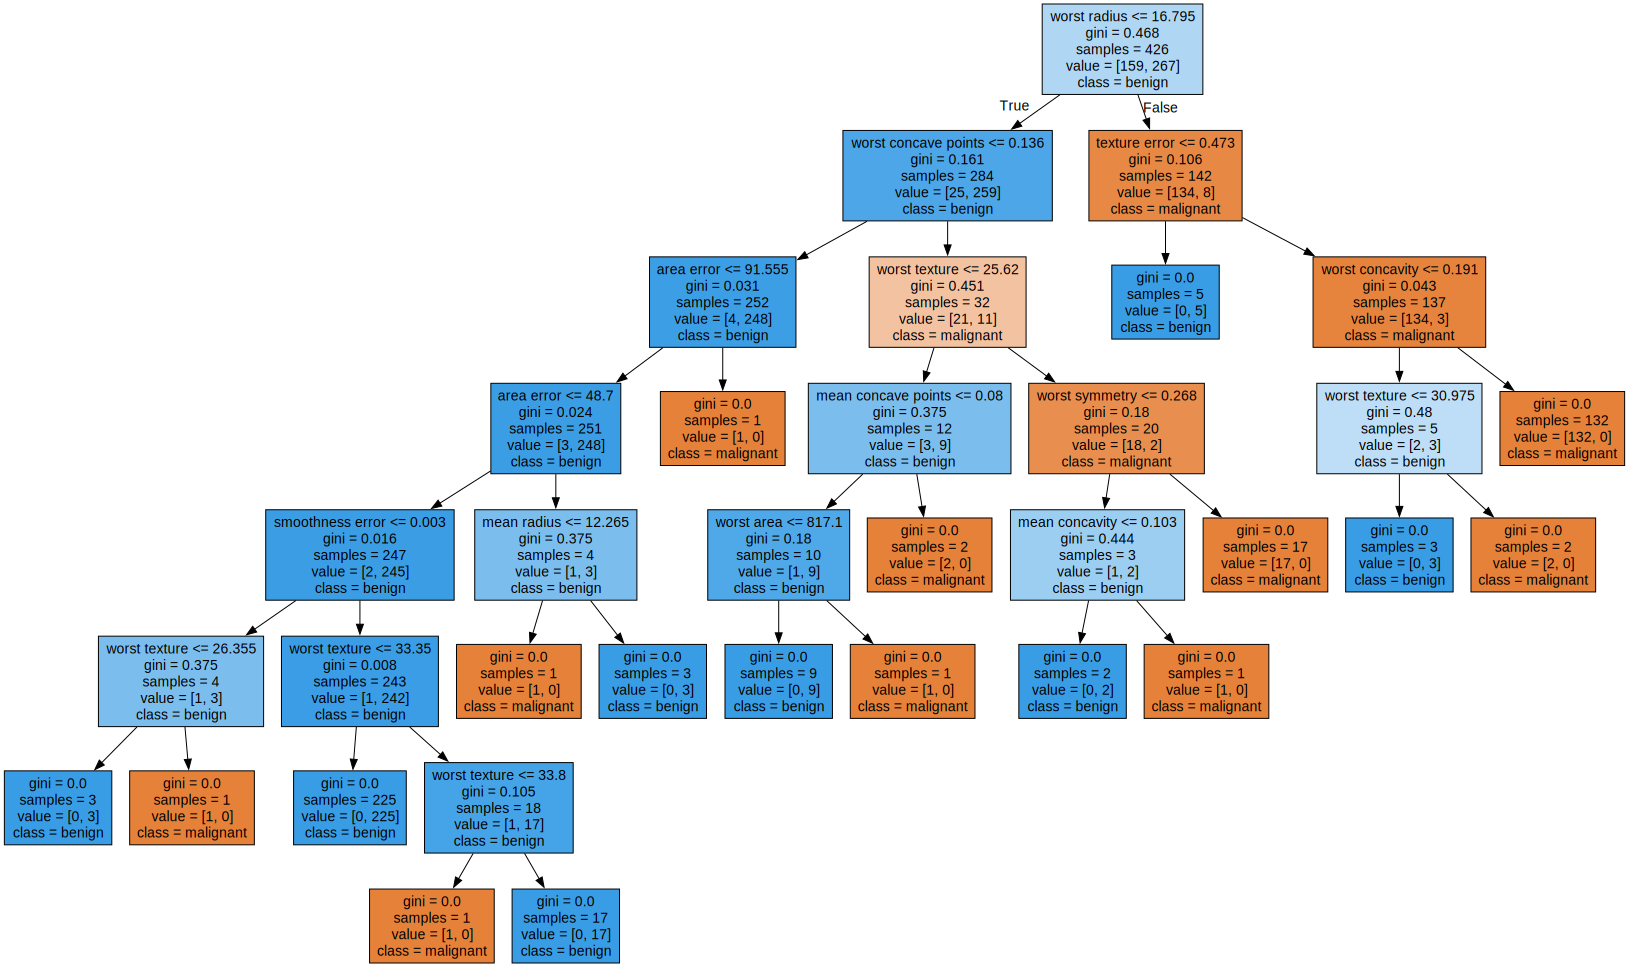

In [8]:
import graphviz

with open('data-files/breast-cancer-dtc.dot', 'rt') as f:
    graph_data = f.read()

graphviz.Source(graph_data)

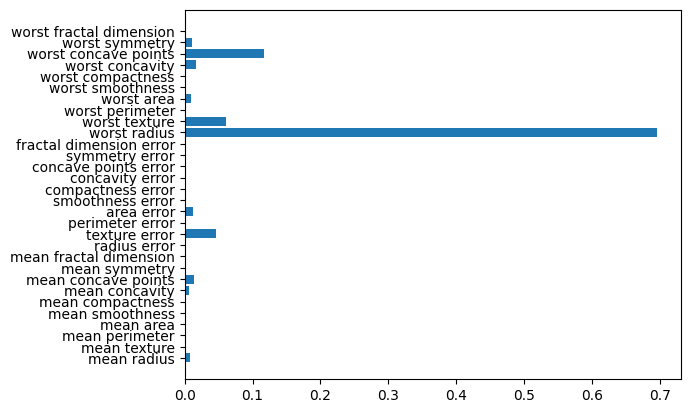

In [9]:
# plt.bar(breast_cancer['feature_names'], dtc.feature_importances_)
plt.barh(breast_cancer['feature_names'], dtc.feature_importances_)
plt.show()

In [10]:
# 데이터 준비
from sklearn.datasets import make_moons # 분류용 데이터셋 생성기

X, y = make_moons(n_samples=300, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
# y0_mask = y==0
# y1_mask = y==1
# plt.scatter(X[y0_mask, 0], X[y0_mask, 1], c="purple")
# plt.scatter(X[y1_mask, 0], X[y1_mask, 1], c="black")
# plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

logreg = LogisticRegression()
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)

logreg.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

logreg.score(X_test, y_test), dtc.score(X_test, y_test), rfc.score(X_test, y_test)

(0.8266666666666667, 0.9066666666666666, 0.9333333333333333)

In [12]:
# 과대 적합 상태 확인
rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(1.0, 0.9333333333333333)

In [13]:
rfc2 = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=42)
rfc2.fit(X_train, y_train)
rfc2.score(X_train, y_train), rfc2.score(X_test, y_test)

(1.0, 0.9333333333333333)

In [14]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X = breast_cancer['data']
y = breast_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [15]:
rfc3 = RandomForestClassifier(n_estimators=1000, 
                            max_depth=2, 
                            max_features='sqrt', # 트리에서 사용할 속성 갯수
                            bootstrap=True, # 트리에서 사용할 데이터 샘플링 설정 ( 복원 추출 ),
                            max_samples=X_train.shape[0], # 트리에서 사용할 데이터 갯수
                            random_state=42)
rfc3.fit(X_train, y_train)
rfc3.score(X_train, y_train), rfc3.score(X_test, y_test)

(0.9671361502347418, 0.958041958041958)

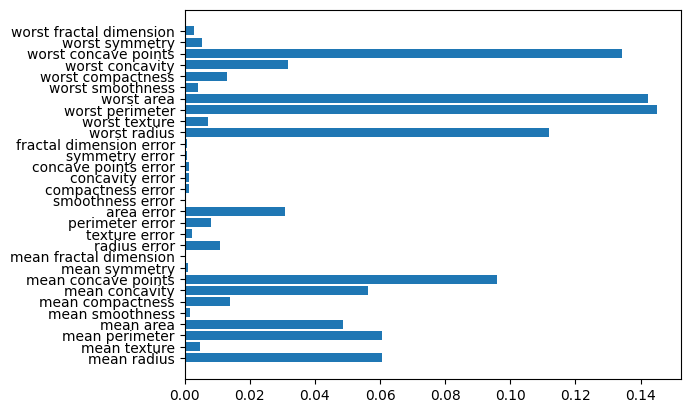

In [16]:
plt.barh(breast_cancer['feature_names'], rfc3.feature_importances_)
plt.show()

(1797, 64)
0


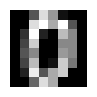

In [25]:
# 데이터 준비
from sklearn.datasets import load_digits

digits = load_digits()
X = digits['data']
y = digits['target']

print(X.shape)

print(y[0])
plt.figure(figsize=(1, 1))
# plt.imshow(X[0].reshape(1, 64), cmap="gray") # 이미지 표시
plt.imshow(X[0].reshape(8, 8), cmap="gray") # 이미지 표시
plt.axis("off")
plt.show()

In [18]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [29]:
# 10개 숫자의 분류 모델 만들기
# 3과 3이 아닌 숫자 분류 모델 만들기
yis3 = (y==3).astype(int)
np.unique(yis3, return_counts=True)

X_train, X_test, y_train, y_test = train_test_split(X, yis3, stratify=yis3, random_state=42)

rfc = RandomForestClassifier(n_estimators=1000, random_state=0)
rfc.fit(X_train, y_train)

rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(1.0, 0.9866666666666667)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=1000)

gbc.fit(X_train, y_train)

gbc.score(X_train, y_train), gbc.score(X_test, y_test)

(1.0, 0.9933333333333333)

In [32]:
gbc.feature_importances_

array([0.00000000e+00, 5.88829377e-03, 1.30100987e-02, 3.63225661e-04,
       2.09579359e-03, 6.28914945e-05, 1.03416538e-09, 0.00000000e+00,
       5.35738883e-09, 1.00554540e-02, 1.13051512e-05, 1.52926734e-03,
       3.24822514e-03, 2.64617236e-03, 3.60001847e-03, 1.02300338e-06,
       0.00000000e+00, 5.57334077e-03, 1.75871795e-02, 5.06768832e-02,
       3.96793683e-03, 1.83145795e-03, 3.74359790e-11, 0.00000000e+00,
       0.00000000e+00, 4.67009512e-03, 2.15702719e-01, 2.01131547e-04,
       4.90751439e-04, 5.37729251e-02, 7.10723646e-02, 0.00000000e+00,
       0.00000000e+00, 2.37151613e-09, 2.67382550e-02, 9.78462809e-04,
       5.80016214e-03, 2.94408004e-03, 3.95694537e-12, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.38502193e-03, 4.02834224e-01,
       2.21760777e-03, 1.55950830e-02, 2.57033030e-02, 0.00000000e+00,
       0.00000000e+00, 2.57422155e-04, 2.12106492e-03, 1.74632799e-02,
       1.22578531e-03, 1.98825785e-03, 2.23885522e-03, 1.89988983e-06,
      